<a href="https://colab.research.google.com/github/gwenostergren/20MA573/blob/master/src/HW03_All_Parts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Packages to Import
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import scipy.optimize as so

#Option Combinations

Recall that, 


__Written K-strike straddle__ is a portfolio of
- selling K-strike call of one unit
- selling K-strike put of one unit

__Butterfly__ with three stikes $K_1 < K_2 < K_3$ is the portfolio of
- 1 unit of written K-strike straddle
- 1 unit of purchased K-strike call
- 1 unit of purchased K-strike put

Plot a diagram of exercise price versus payoff for the following portfolios:
- written 40-strike straddle
- a butterfly consists of
  - written 40-strike straddle
  - purchased 45-strike call
  - purchased 35-strike put

In [0]:
'''Option Class Initialization Based on Lecture Notes'''

class VanillaOption:
    def __init__(
        self,
        otype = 1, # 1: 'call', -1: 'put'
        strike = 110.,
        maturity = 1.,
        market_price = 10.):
      self.otype = otype
      self.strike = strike
      self.maturity = maturity
      self.market_price = market_price
      
    def explain_yourself(self): #printing option type
      if self.otype == 1:
        print("I am a call.")
      if self.otype == -1:
        print("I am a put.")
        
    def payoff(self, s): #s: excercise price
      otype = self.otype
      k = self.strike
      maturity = self.maturity
      return max([0, (s - k)*otype])



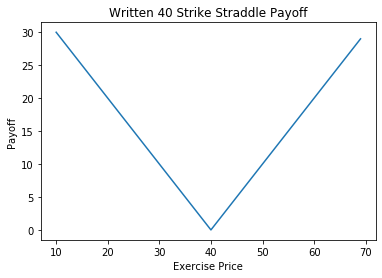

In [157]:
# Plotting Excercise Price vs Payoff of a Written 40-Strike Saddle
option_wss_call = VanillaOption(otype = 1, strike = 40, maturity = 1.)
option_wss_put = VanillaOption(otype = -1, strike = 40, maturity = 1.)

strike_list = range(10,70)

wss_call_payoff = [option_wss_call.payoff(s) for s in strike_list]
wss_put_payoff = [option_wss_put.payoff(s) for s in strike_list]
wss_payoff_list = []

if(len(wss_call_payoff)==len(wss_put_payoff)):
  for i in range(0, len(wss_call_payoff)): 
    wss_payoff_list.append(wss_call_payoff[i] + wss_put_payoff[i])
else:
  print("Error, option payoff not called on same range")

plt.plot(strike_list, wss_payoff_list)
plt.xlabel('Exercise Price')
plt.ylabel('Payoff')
plt.title('Written 40 Strike Straddle Payoff');
plt.show()

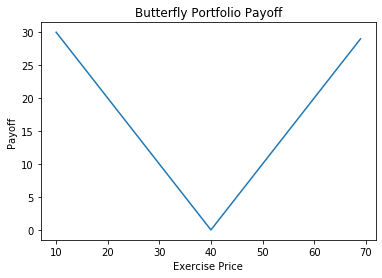

In [158]:
# Plotting Excercise Price vs Payoff of an Example Butterfly Portfolio
option_fly_call = VanillaOption(otype= 1, strike= 45, maturity= 1.)
option_fly_put = VanillaOption(otype= -1, strike= 35, maturity= 1.)

fly_call_payoff = [option_fly_call.payoff(s) for s in strike_list]
fly_put_payoff = [option_fly_put.payoff(s) for s in strike_list]
fly_payoff_list = []


if(len(wss_payoff_list) == len(fly_call_payoff) and len(wss_payoff_list) == len(fly_put_payoff)):
  for i in range(0,len(fly_call_payoff)):
    fly_payoff_list.append(wss_payoff_list[i] + fly_call_payoff[i] + fly_put_payoff[i])
else:
  print("Error, option payoff not called on same range")

plt.plot(strike_list, wss_payoff_list)
plt.xlabel('Exercise Price')
plt.ylabel('Payoff')
plt.title('Butterfly Portfolio Payoff');
plt.show()

#BSM Price Change

Consider an european option with
- call type
- strike = 110
- maturity = T
underlying a Gbm stock with
- initial: 100
- interest rate: 4.75%
- vol ratio: $\sigma$

We denote this bsm price by $f(\sigma, T)$.

- Let $\sigma = 20\%$ fixed. plot $T \mapsto f(0.2, T)$ when $T$ is ranging over $(0.5, 2)$.

- Let $T = 1$ fixed. plot $\sigma \mapsto f(\sigma, 1)$ when $\sigma$ is ranging over $(.05, 0.5)$

- Describe your observations. Do you think the same behavior is also true for put?

- Could you prove your observations?

In [0]:
'''Geometric Brownian Motion Class Initialization Based on Lecture '''

class Gbm:
    def __init__(self,
                 init_state = 100.,
                 drift_ratio = .0475,
                 vol_ratio = .2
                ):
        self.init_state = init_state
        self.drift_ratio = drift_ratio
        self.vol_ratio = vol_ratio

    #Black-Scholes-Merton formula. 
    def bsm_price(self, vanilla_option):
      s0 = self.init_state
      sigma = self.vol_ratio
      r = self.drift_ratio
    
      otype = vanilla_option.otype
      k = vanilla_option.strike
      maturity = vanilla_option.maturity
    
      d1 = (np.log(s0 / k) + (r + 0.5 * sigma ** 2) 
        * maturity) / (sigma * np.sqrt(maturity))
      d2 = d1 - sigma * np.sqrt(maturity)
    
      return (otype * s0 * ss.norm.cdf(otype * d1)
          - otype * np.exp(-r * maturity) * k * ss.norm.cdf(otype * d2))

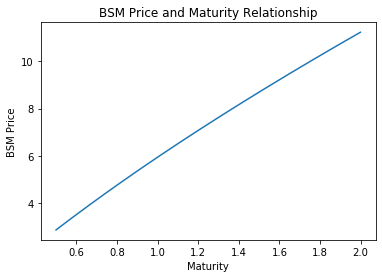

In [160]:
#Let Sigma = 20%, Plot T and BSM when T is between (0.5,2)
stock1 = Gbm(init_state= 100., drift_ratio=0.0475, vol_ratio=0.2)

mat_bsmlist = []
mat_list = np.arange(0.5, 2., 0.001)

for i in mat_list:
  mat_test = VanillaOption(otype= 1, strike= 110, maturity= i)
  mat_bsmlist.append(stock1.bsm_price(mat_test))


plt.plot(mat_list, mat_bsmlist)
plt.xlabel('Maturity')
plt.ylabel('BSM Price')
plt.title('BSM Price and Maturity Relationship');
plt.show()

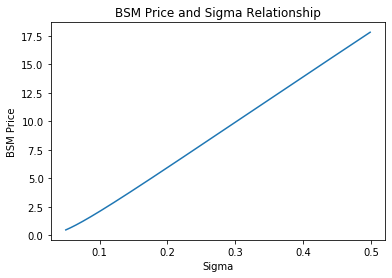

In [161]:
#Let T = 1. Plot Sigma and BSM price when sigma is between (0.05,0.5)

option1_bsmtest = VanillaOption(otype= 1, strike= 110, maturity= 1.)

sig_bsmlist = []
sig_list = np.arange(0.05, 0.5, 0.001)

for i in sig_list:
  sig_test = Gbm(init_state= 100., drift_ratio=0.0475, vol_ratio= i)
  sig_bsmlist.append(sig_test.bsm_price(option1_bsmtest))

plt.plot(sig_list, sig_bsmlist)
plt.xlabel('Sigma')
plt.ylabel('BSM Price')
plt.title('BSM Price and Sigma Relationship');
plt.show()

**Describe your observations. Do you think the same behavior is true for put?**

In both cases, as sigma or the maturity increases, the BSM price increases. I believe this behavior is consistent with what it should be. As the volatility of a stock increases, there is a possibility for larger profits and the positive correlation between the price and the volitility reflects this relationship. Also, as the maturity of a stock increases, there is additional opportunity for larger profits and the positive correlation between the price and maturity reflects this. 

Since calls and puts are priced similarly under BSM pricing, and higher volatility or maturity also creates opportunity for higher profits, I believe that puts should chart the same positive linear relationship. 

**Could you prove your observations?**
If there was a negative correlation instead of a positive correlation, it would mean that the lower the risk the higher the reward. Which would create an arbitrage opportunity. 


#Implied Volatility

- Prove the following facts: Supose $f$ is a function satisfying
  - $f(0) = f_{min},$ and $\lim_{x\to \infty}f(x) =  f_{max}$
  - $f$ is continuous
  - $f$ is strictly increasing
  
  then, for any $p\in  (f_{min}, f_{max})$, 
  - there exists unique $\hat \sigma$, such that $f(\hat \sigma) = p$ and  
  $$\hat \sigma = \arg\min_{\sigma\in (0,\infty)} | f(\sigma) - p|.$$

**Proof** 

By the intermediate value theorem, it follows that there exists a unique $\hat \sigma$ such that $f( \hat \sigma) = p$, and that this $\hat \sigma$ is unique. To prove the second part of this statement, we first rewrite it. $\hat \sigma = \arg\min_{\sigma\in (0,\infty)} | f(\sigma) - p| =  [x | y $ such that $ |f(y)-p| \leq |f(x)-p|]$. Since sigma is unique by IVT, we have that this set must be equal to  $\hat \sigma$.


- Now we denote by $f(\sigma)$ the BSM put price with the following parameters:
  - vol_ratio = $\sigma$; spot_price = 100.; drift_ratio = .0475; strike = 110.; maturity = 1.
  
  Answer the following questions:
  - What is $f_{min}$ and $f_{max}$?
  - Is $f$ strictly increasing on $(0,\infty)$? Justify your answer.
  - If the market put price is $10$, then what's the implied volatility?

- Find its implied volatility with the following parameters:
  - BSM call price is 10.;  spot_price = 100.; drift_ratio = .0475; strike = 110.; maturity = 1.



In [162]:
##What is fmin and fmax in these conditions?##

option2_voltest = VanillaOption(otype= -1, strike= 110, maturity= 1.)

sig_vol_list = []
sig_list = np.arange(0.0001, 1000., 1.)

for i in sig_list:
  sig_vol_test = Gbm(init_state= 100., drift_ratio = 0.0475, vol_ratio = i)
  sig_vol_list.append(sig_vol_test.bsm_price(option1_bsmtest))

max_bsm_price = max(sig_vol_list)
min_bsm_price = min(sig_vol_list)

print("The maximum value of f(sigma) is " + str(max_bsm_price))
print("The minimum value of f(sigma) is " + str(min_bsm_price))

The maximum value of f(sigma) is 100.0
The minimum value of f(sigma) is 0.0


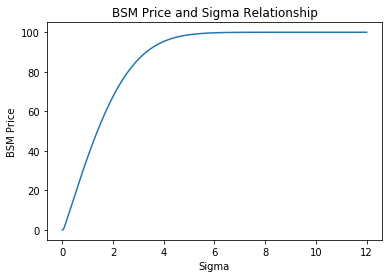

In [163]:
##Is f strictly increasing from 0 to infinity?##

sig_vol_list = []
sig_list = np.arange(0.0001, 12., 0.001)

for i in sig_list:
  sig_vol_test = Gbm(init_state= 100., drift_ratio = 0.0475, vol_ratio = i)
  sig_vol_list.append(sig_vol_test.bsm_price(option1_bsmtest))

plt.plot(sig_list, sig_vol_list)
plt.xlabel('Sigma')
plt.ylabel('BSM Price')
plt.title('BSM Price and Sigma Relationship');
plt.show()

From the plot above, we cans see that f should be strictly increasing from 0 to infinity. Once the plot approaches 100, it will even out as the inputed sigma approaches infinity. In the visible area here, it is never decreasing. 

In [0]:
def error_function(vol, gbm, option):
  gbm.vol_ratio = vol
  return abs(option.market_price - gbm.bsm_price(option))
  
def implied_volatility(gbm, option):
  init_vol = .1 #initial guess
  return so.fmin(error_function, init_vol, 
                 args = (gbm, option), disp = 0)[0]

In [165]:
##If the market put price is 10, what is the implied volatility? ##

gbm1 = Gbm(init_state= 100., drift_ratio= 0.0475)
option3_voltest = VanillaOption(otype= -1, strike= 110, market_price= 10, maturity= 1.)

print("The implied volatility is " )
implied_volatility(gbm1, option3_voltest)


The implied volatility is 


0.17867187500000026

In [166]:
#Find its implied volatility within the following parameters
option4_iv = VanillaOption(otype= 1, strike= 110, market_price= 10, maturity= 1.)
gbm2= Gbm(init_state=100, drift_ratio= 0.0475)

print("The implied volatility is " )
implied_volatility(gbm1, option4_iv)

The implied volatility is 


0.3020312500000007